In [1]:
#!/usr/bin/python
#import wradlib as wrl
import pylab as pl
from glob import glob
import warnings
warnings.filterwarnings('ignore')
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np

import csv
import os
import datetime
import pandas as pd

#shapefile: GIS vector data format (ESRI)
import shapefile as shp  # Requires the pyshp package
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import ticker
import netCDF4 as nc4
from datetime import date,timedelta
import plotly.graph_objs as go
import matplotlib.lines as mlines
import seaborn as sns

import importlib
import geopandas as gpd
from geopandas.tools import sjoin
import xarray as xr
import cartopy.crs as ccrs  # Projections list

import _pickle as pickle

#import external functions (need pip install ipynb)
import ipynb.fs.full.HaileventsFunctions as HF

# Notebook to compare filtered and non-filtered OTs dataset 

starting from single events and then build an extended statistic

In [2]:
#Folder address containing data:
fold = '/home/ciccuz/phd/KIT/hail_data/'
plt_fold = '/home/ciccuz/phd/KIT/scripts/plots/OT_filt-nonfilt_EventsComparison/filter3h_5-95percThresholds'

In [3]:
# must run the bash command: sshfs -p22 giordano@imk-tss-risk:/hail4/punge/ ./hail4_punge/

#With geopandas: NEW VERSION!
sfg_ita = gpd.read_file(fold + "hail4_punge/geodata/ITA_adm/ITA_adm0.shp", encoding='latin-1')
sfg_deu = gpd.read_file(fold + "hail4_punge/geodata/DEU_adm/DEU_adm0.shp", encoding='latin-1')
sfg_aut = gpd.read_file(fold + "hail4_punge/geodata/AUT_adm/AUT_adm0.shp", encoding='latin-1')
sfg_che = gpd.read_file(fold + "hail4_punge/geodata/CHE_adm/CHE_adm0.shp", encoding='latin-1')
sfg_cro = gpd.read_file(fold + "hail4_punge/geodata/Croatia/mj788hg8036.shp", encoding='latin-1')
sfg_slo = gpd.read_file(fold + "hail4_punge/geodata/Slovenia/gk259nt7452.shp", encoding='latin-1')
sfg_hun = gpd.read_file(fold + "hail4_punge/geodata/Hungary/qh513vs8921.shp", encoding='latin-1')
sfg_alg = gpd.read_file(fold + "hail4_punge/geodata/algeria/rt767cn2098.shp", encoding='latin-1')
sfg_tun = gpd.read_file(fold + "hail4_punge/geodata/tunisia/TUN_adm0.shp", encoding='latin-1')
sfg_bos = gpd.read_file(fold + "hail4_punge/geodata/bosnia/bt512fj0408.shp", encoding='latin-1')
sfg_fra = gpd.read_file(fold + "hail4_punge/geodata/france/dw125xh0996.shp", encoding='latin-1')
sfg_mon = gpd.read_file(fold + "hail4_punge/geodata/montenegro/MNE_adm0.shp", encoding='latin-1')
sfg_cze = gpd.read_file(fold + "hail4_punge/geodata/czech/CZE_adm0.shp", encoding='latin-1')
sfg_svk = gpd.read_file(fold + "hail4_punge/geodata/slovakia/SVK_adm0.shp", encoding='latin-1')


#lat/lon coords to cover the whole SPHERA domain:
lonmin=6; lonmax=19; latmin=35; latmax=49
latplot=[latmin,latmax]; lonplot=[lonmin,lonmax]

#maps limits whole SPHERA domain
x_lim=lonplot
y_lim=latplot


#shapefile in vector form for considering multiple geographic shapefiles
sf_geo = [sfg_ita, sfg_aut, sfg_deu, sfg_che, sfg_cro, sfg_slo, sfg_hun, sfg_alg, sfg_tun, sfg_fra, sfg_bos,
          sfg_mon, sfg_cze, sfg_svk]

hhmin=0; hhmax=23

In [4]:
#Read and store cities and their features to be used in the maps:
clonsel, clatsel, csizesel, cnamesel, ckindsel = HF.HF_cities(latmin,latmax,lonmin,lonmax)

## - Comparison for single event days

In [5]:
#EVENT CASE:

"""
7 April 2016 (Condove - Torino)
"""
#day=2016098; dtime=datetime.datetime.strptime('2016-04-07','%Y-%m-%d')

"""
8 April 2016 (Condove - Torino)
"""
#day=2016099; dtime=datetime.datetime.strptime('2016-04-08','%Y-%m-%d')

"""
18 June 2016 (Asiago - Veneto)
"""
#day=2016170; dtime=datetime.datetime.strptime('2016-06-18','%Y-%m-%d')

"""
24 June 2016 (Dettingen - S Germany)
"""
#day=2016176; dtime=datetime.datetime.strptime('2016-06-24','%Y-%m-%d')

"""
5 August 2016 (Mondolfo (PU) - Marche)
"""
#day=2016218; dtime=datetime.datetime.strptime('2016-08-05','%Y-%m-%d') 

"""
16 August 2016 (Albenga - Savona)
"""
#day=2016229; dtime=datetime.datetime.strptime('2016-08-16','%Y-%m-%d')

"""
29 August 2016 (Torino + Graz)
"""
#day=2016242; dtime=datetime.datetime.strptime('2016-08-29','%Y-%m-%d') 

"""
15 October 2016 (Casalbordino (Chieti) - Abruzzo)
"""
#day=2016289; dtime=datetime.datetime.strptime('2016-10-15','%Y-%m-%d') 

"""
4 May 2017 (Treviso - Veneto)
"""
#day=2017124; dtime=datetime.datetime.strptime('2017-05-04','%Y-%m-%d') 

"""
14 May 2017 (Veneto - Nord-est Italy)
"""
#day=2017134; dtime=datetime.datetime.strptime('2017-05-14','%Y-%m-%d') 

"""
25 June 2017 (Nord-est Italy)
"""
#day=2017176; dtime=datetime.datetime.strptime('2017-06-25','%Y-%m-%d') 

"""
27 June 2017 (Asti)
"""
#day=2017178; dtime=datetime.datetime.strptime('2017-06-27','%Y-%m-%d')  

"""
28 June 2017 (Nord Italy)
"""
#day=2017179; dtime=datetime.datetime.strptime('2017-06-28','%Y-%m-%d')  

"""
29 July 2017 (Pontenure - Piacenza - Emilia Romagna)
"""
#day=2017210; dtime=datetime.datetime.strptime('2017-07-29','%Y-%m-%d')  

"""
9-10 August 2017 (Trentino Sudtirol)
"""
#day=2017221; dtime=datetime.datetime.strptime('2017-08-09','%Y-%m-%d')
#day=2017222; dtime=datetime.datetime.strptime('2017-08-10','%Y-%m-%d') 

"""
18 August 2017 (Bohringer - South Germany)
"""
#day=2017230; dtime=datetime.datetime.strptime('2017-08-18','%Y-%m-%d')  

"""
4 June 2018 (Noceto - Parma - Emilia Romagna)
"""
#day=2018155; dtime=datetime.datetime.strptime('2018-06-04','%Y-%m-%d')

"""
23 July 2018 (Turi - Bari)
"""
#day=2018204; dtime=datetime.datetime.strptime('2018-07-23','%Y-%m-%d')

"""
2 September 2018 (Pescara)
"""
#day=2018245; dtime=datetime.datetime.strptime('2018-09-02','%Y-%m-%d') 

"""
7 September 2018 (Carapelle/Orta Nova - Foggia)
"""
#day=2018250; dtime=datetime.datetime.strptime('2018-09-07','%Y-%m-%d') 

"""
7 October 2018 (Melpignano - Lecce)
"""
#day=2018280; dtime=datetime.datetime.strptime('2018-10-07','%Y-%m-%d') 

"""
29 October 2018 (Sardinia)
"""
#day=2018302; dtime=datetime.datetime.strptime('2018-10-29','%Y-%m-%d') 








day=2016148; dtime=datetime.datetime.strptime('2016-05-27','%Y-%m-%d') 

In [7]:
#Read ESWD hail report data: store lat, lon, hail size and datetime, and retain only data in the selected area/time
if (dtime.year >= 1995) & (dtime.year <= 2020):

    #df_eswd = pd.read_csv('/home/bg2896/hail4_giordani/hail_obs/Insurance_ESSL_Italy_data/original_ungridded_data/ESSL/9313218694_v1_6_Giordani_LargeHail_Italy_1995-01-01_2020-12-31_data.csv')
    df_eswd = pd.read_csv(fold + 'hail4_punge/ESWD/ESWD_HAIL_19790101-20200531_v1_6.csv')   #Swabian Jura 2013
    
    #selection over the whole SPHERA domain
    eswd_ev_sel = HF.HF_eswd_df(df_eswd,dtime.year,dtime.month,dtime.day,hhmin,hhmax,latmin,latmax,lonmin,lonmax)
   
else:
    eswd_ev_sel = pd.DataFrame()
   
eswd_ev_sel

,datetime,lat,lon,size,QC_level
0,2016-05-27 13:00:00,48.383,15.183,3.0,QC0+
1,2016-05-27 13:00:00,48.592,14.750,5.0,QC0+
2,2016-05-27 13:20:00,48.811,14.315,4.0,QC2
3,2016-05-27 13:35:00,48.781,14.352,4.0,QC2
4,2016-05-27 13:55:00,48.686,14.577,5.0,QC2
5,2016-05-27 14:00:00,48.650,14.550,5.0,QC1
6,2016-05-27 14:00:00,47.939,16.473,3.5,QC0+
7,2016-05-27 14:18:00,47.883,16.233,2.0,QC1
8,2016-05-27 14:30:00,47.667,15.933,2.5,QC0+
9,2016-05-27 14:30:00,48.583,14.750,5.0,QC0+


In [8]:
#Read UNIPOL insurance claims for hail events:
if (dtime.year >= 2017) & (dtime.year <= 2020):
   
    df_unipol = pd.read_csv(fold + 'data/ESWD_insurance/Insurance_ESSL_Italy_data/original_ungridded_data/UNIPOL/Estrazione_SINISTRI_GRANDINE_E_VENTO_ITALIA_DateLatLon.csv')
    
    #selection over the whole SPHERA domain
    u_ev_sel = HF.HF_unipol_df(df_unipol,dtime.year,dtime.month,dtime.day,hhmin,hhmax,latmin,latmax,lonmin,lonmax)

u_ev_sel

NameError: name 'u_ev_sel' is not defined

In [9]:
#read dictionary from external file
with open(fold + f'data/OT_filtered_data/tempAgg_3h_5-95pThresh/OTfilt_{day}.txt', "rb") as file:  
     OT_dict = pickle.load(file)

In [10]:
orig_OT = OT_dict['ORIGINAL_OTs']
filt_OT = OT_dict['FILTERED_OTs']

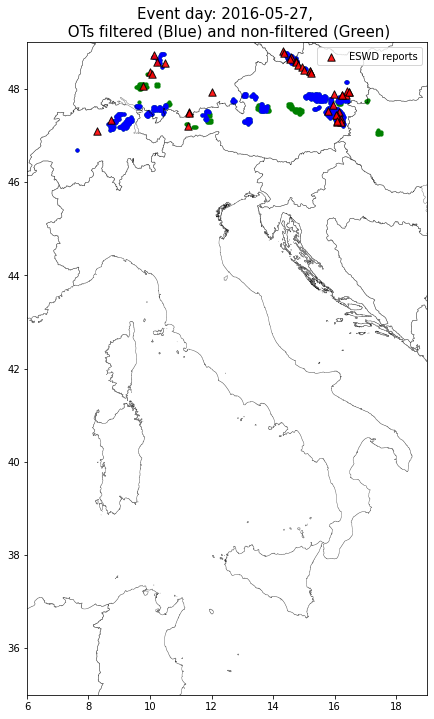

In [21]:
fig, ax = plt.subplots(figsize = (20,12))

plt.xlim(x_lim)
plt.ylim(y_lim) #y_lim

#filtered and non-filtered OTs detections    
for hour in orig_OT.keys():
    orig_OT[hour][['otpmax','geometry']].plot(ax=ax, markersize=10, figsize=(12, 8), column='otpmax', 
                                              color='green', zorder=1)
    if len(filt_OT[hour]) != 0:
        filt_OT[hour][['otpmax','geometry']].plot(ax=ax, markersize=10, figsize=(12, 8), column='otpmax', 
                                                  color='blue', zorder=2)
#shapefiles    
for shp in sf_geo:
    shp.plot(ax=ax, alpha = 0.5, facecolor = 'none', lw = 0.5, zorder=2)

#eswd 
if len(eswd_ev_sel) != 0:
    pl.scatter(eswd_ev_sel.lon,eswd_ev_sel.lat,55,c='red',marker="^",edgecolor='k',alpha=0.9,zorder=4, 
           label='ESWD reports')
#unipol
#if len(u_ev_sel) != 0:
#    pl.scatter(u_ev_sel.lon,u_ev_sel.lat,20,c='red',marker="o",edgecolor='k',alpha=0.9,zorder=4, 
#           label='UNIPOL reports')

plt.legend(loc='best')

plt.title(f'Event day: {dtime.year}-{dtime.month:02d}-{dtime.day:02d}, \n OTs filtered (Blue) and non-filtered (Green)',
         fontsize=15);

#pl.savefig(plt_fold + f"/{dtime.year}-{dtime.month:02d}-{dtime.day:02d}_no_UNIPOL.png",dpi=200, bbox_inches='tight')

## - Comparison aggregating all 23 event days together:

Plot maps of OT count (spatial frequency) before and after filter, and a map of the percentage of OTs retained or eliminated after the filtering

In [5]:
#read dictionary from external file

eventdays = [
20160407, 20160408, 20160618, 20160624, 20160805, 20160816, 20160829, 20161015,
20170504, 20170514, 20170625, 20170627, 20170628, 20170729, 20170809, 20170810, 20170818,
20180604, 20180723, 20180902, 20180907, 20181007, 20181029]

OT_allEvents = dict()

for eventday in eventdays:

    with open(fold + f'data/OT_filtered_data/tempAgg_3h/OTfilt_{eventday}.txt', "rb") as file:  
        OT_dict = pickle.load(file)
    
    OT_allEvents[eventday] = OT_dict

In [6]:
#extract the full sets of all OTs and filtered OTs considering the whole sample of events

all_OTset = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])
filt_OTset = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])

for eventday in eventdays:
    
    OTday_hours = OT_allEvents[eventday]['ORIGINAL_OTs'].keys()
    
    for hour in OTday_hours:
        
        all_OTset = all_OTset.append(OT_allEvents[eventday]['ORIGINAL_OTs'][hour].reset_index(drop=True))
        filt_OTset = filt_OTset.append(OT_allEvents[eventday]['FILTERED_OTs'][hour].reset_index(drop=True))

all_OTset = all_OTset.reset_index(drop=True)
filt_OTset = filt_OTset.reset_index(drop=True) 

In [7]:
all_OTset

,lon,lat,time,otpmax,geometry
0,8.702145,36.784000,2016-04-07T00:00:00Z,0.73,POINT (8.70214 36.78400)
1,8.702145,36.748283,2016-04-07T00:00:00Z,0.73,POINT (8.70214 36.74828)
2,8.914430,37.886143,2016-04-07T01:00:00Z,0.63,POINT (8.91443 37.88614)
3,9.127715,37.850426,2016-04-07T01:00:00Z,0.57,POINT (9.12772 37.85043)
4,9.163430,37.849426,2016-04-07T01:00:00Z,0.57,POINT (9.16343 37.84943)
...,...,...,...,...,...
65571,7.566287,39.365429,2018-10-29T23:00:00Z,0.58,POINT (7.56629 39.36543)
65572,7.460144,39.330711,2018-10-29T23:00:00Z,0.58,POINT (7.46014 39.33071)
65573,7.494859,39.329712,2018-10-29T23:00:00Z,0.58,POINT (7.49486 39.32971)
65574,7.530573,39.327713,2018-10-29T23:00:00Z,0.58,POINT (7.53057 39.32771)


In [8]:
filt_OTset

,lon,lat,time,otpmax,geometry
0,9.270573,37.707569,2016-04-07T01:00:00Z,0.66,POINT (9.27057 37.70757)
1,9.305286,37.706570,2016-04-07T01:00:00Z,0.66,POINT (9.30529 37.70657)
2,8.771573,37.528000,2016-04-07T01:00:00Z,0.67,POINT (8.77157 37.52800)
3,8.806287,37.527000,2016-04-07T01:00:00Z,0.67,POINT (8.80629 37.52700)
4,8.842001,37.527000,2016-04-07T01:00:00Z,0.67,POINT (8.84200 37.52700)
...,...,...,...,...,...
58115,7.530573,39.363430,2018-10-29T23:00:00Z,0.58,POINT (7.53057 39.36343)
58116,7.566287,39.365429,2018-10-29T23:00:00Z,0.58,POINT (7.56629 39.36543)
58117,7.460144,39.330711,2018-10-29T23:00:00Z,0.58,POINT (7.46014 39.33071)
58118,7.494859,39.329712,2018-10-29T23:00:00Z,0.58,POINT (7.49486 39.32971)


During the 23 days of events considered a total of **65576** OTs (with prob >=50%) have been detected, over **LAND** instead **40556**

- After the filtering with **FILTER4h** **58487** OTs remained (meaning that **7089** have been filtered, i.e. approx the **10%**)  Over **LAND**: after filtering **40724** remained (meaning that **5268** have been filtered over land, i.e. **11%**)


- With **FILTER3h** instead **58120** OTs remained (meaning that **7456** have been filtered, i.e. 11%). Over **LAND**: after filtering **40556** remained (meaning that **5436** have been filtered over land only, i.e. **12%**)

Now plot OT data as density maps over SPHERA domain, use **Kernel Density Estimation** *KDE plot*?  (Kernel density estimation is a technique that non-parameterically estimates a distribution function for a sample of point observations.) It is like plotting a PDF in 2 dimensions (more or less) https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html

- https://aeturrell.github.io/coding-for-economists/geo-vis.html
- https://residentmario.github.io/geoplot/plot_references/plot_reference.html

(for gridlines with cartopy/geoplot: https://scitools.org.uk/cartopy/docs/latest/matplotlib/gridliner.html#cartopy-map-gridlines-and-tick-labels)

In [12]:
orig_OT_allH = pd.DataFrame()

for hour in orig_OT.keys():
        
        orig_OT_allH = orig_OT_allH.append(orig_OT[hour].reset_index(drop=True))

orig_OT_allH = orig_OT_allH.reset_index(drop=True)

NameError: name 'orig_OT' is not defined

TypeError: no numeric data to plot

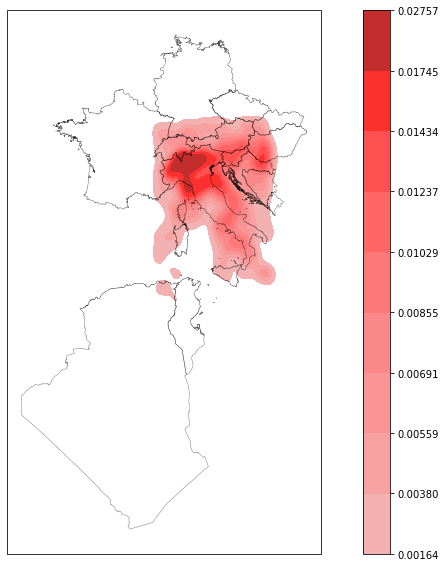

In [15]:
ax = plt.subplots(1,1,figsize = (15,10))

ax=plt.axes(projection=ccrs.PlateCarree())

sns.kdeplot(all_OTset.lon,all_OTset.lat, data=all_OTset, ax=ax, shade=True, color="red", cbar=True,
              xlim=x_lim, ylim=y_lim)

#shapefiles    
for shp in sf_geo:
    shp.plot(ax=ax, alpha = 0.5, facecolor = 'none', lw = 0.5, zorder=2)

orig_OT_allH.plot(ax=ax, markersize=.05, color='black')    

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')

ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

plt.title('KDE of unfiltered set of OT occurrences over 23 event days', fontsize=15);

Problem: colorbar shows values of density for each pixel (Count number per unit area, so very low values over the whole area), while I would like to see the number of OT counts related to color (similarly as Punge 2022, fig. 3) -> not possible to change colorbar values (as this would "trick" the chart with not right values: https://stackoverflow.com/questions/70378659/adjusting-the-cbar-values-in-kdeplot)
Try other ways:

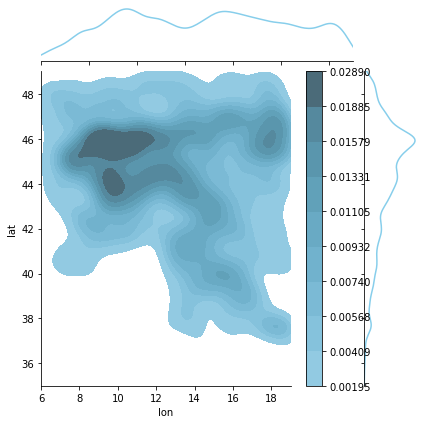

In [16]:
sns.jointplot(filt_OTset.lon,filt_OTset.lat, data=filt_OTset, kind="kde", color="skyblue", shade=True, cbar=True,
              xlim=x_lim, ylim=y_lim)

#### - Spatial join between the points and the grid (for the moment 10km grid SPHERA used) to count  Number of OTs in grid

In [17]:
#Read SPHERA data (10km grid) and couple box number to coordinate locations:
sfg_sp = gpd.read_file(fold + "data/lampinet/mask/grid_10_49N.shp", encoding='latin-1')

In [18]:
#add columns of 1s to be summed in the spatial join with grid:
all_OTset['N_OT'] = 1

points = all_OTset
grid = sfg_sp

#spatial join between points and grid
pointInPolys = sjoin(points, grid, how='left').drop(['index_right'],axis=1)

#sum points in each grid cell
pointSumByPoly = pointInPolys.groupby('FID')['N_OT'].agg(['sum'])

#create grid with associated number of OTs for each grid:
allOT_countOnGrid = sfg_sp.copy()
allOT_countOnGrid['N_OT'] = pointSumByPoly['sum']

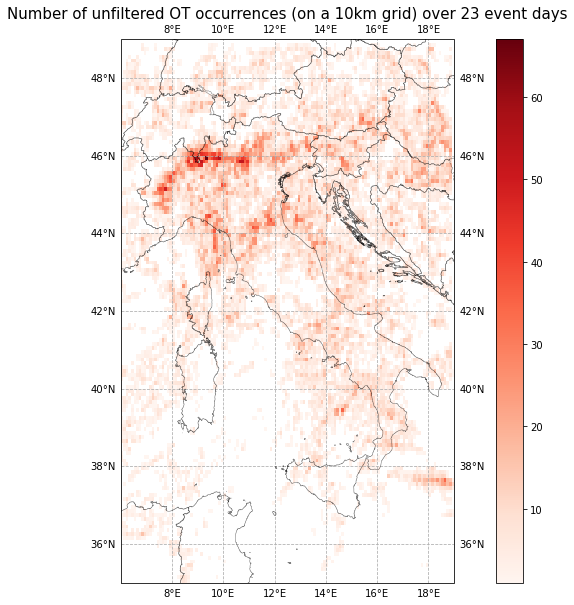

In [19]:
ax = plt.subplots(1,1,figsize = (15,10))

ax=plt.axes(projection=ccrs.PlateCarree())

allOT_countOnGrid.plot(column='N_OT', ax=ax, cmap='Reds', kind='geo', zorder=1, legend=True, label='asd')

#shapefiles    
for shp in sf_geo:
    shp.plot(ax=ax, alpha = 0.5, facecolor = 'none', lw = 0.5, zorder=3)

#orig_OT_allH.plot(ax=ax, markersize=.05, color='black')    

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')

ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

plt.title('Number of unfiltered OT occurrences (on a 10km grid) over 23 event days', fontsize=15);